In [83]:
import os
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from stGACN import stGACN
import scanpy as sc
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/SEDR/lib/R"

In [84]:
import pandas as pd
file_fold ="/home/zhangxinming/mymodel/Data/Breast_Caner"
adata = sc.read_visium(file_fold, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4992 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [85]:
model = stGACN.stGACN(adata,beta=1,neighborhood=4,device=device,model_select='KNN')
# train model
adata = model.train()

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Graph_1 Construction
The graph contains 14976 edges, 4992 cells.
3.0000 neighbors per cell on average.
Graph constructed!
Graph_2 Construction
The graph contains 14976 edges, 4992 cells.
3.0000 neighbors per cell on average.
Begin to train ST data...


  0%|          | 3/800 [00:00<00:31, 25.56it/s]

Overall loss : tensor(33.8661, device='cuda:0', grad_fn=<AddBackward0>)


 13%|█▎        | 103/800 [00:05<00:34, 20.42it/s]

Overall loss : tensor(10.2560, device='cuda:0', grad_fn=<AddBackward0>)


 26%|██▌       | 204/800 [00:10<00:29, 19.91it/s]

Overall loss : tensor(9.5959, device='cuda:0', grad_fn=<AddBackward0>)


 38%|███▊      | 303/800 [00:15<00:24, 20.34it/s]

Overall loss : tensor(8.9547, device='cuda:0', grad_fn=<AddBackward0>)


 50%|█████     | 404/800 [00:20<00:20, 19.65it/s]

Overall loss : tensor(8.7552, device='cuda:0', grad_fn=<AddBackward0>)


 63%|██████▎   | 505/800 [00:25<00:14, 20.11it/s]

Overall loss : tensor(8.9340, device='cuda:0', grad_fn=<AddBackward0>)


 75%|███████▌  | 602/800 [00:30<00:09, 19.99it/s]

Overall loss : tensor(8.4216, device='cuda:0', grad_fn=<AddBackward0>)


 88%|████████▊ | 703/800 [00:35<00:04, 19.67it/s]

Overall loss : tensor(8.3058, device='cuda:0', grad_fn=<AddBackward0>)


100%|██████████| 800/800 [00:40<00:00, 19.69it/s]

Optimization finished for ST data!


In [86]:
tool = 'mclust' 
n_clusters = 15    # same as annotation
radius = 30
# clustering
from stGACN.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=1.8, increment=0.01, refinement=True)

fitting ...
  |======================================================================| 100%


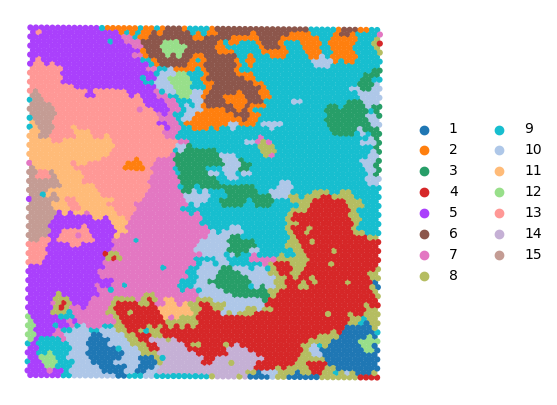

In [87]:
plt.rcParams["figure.figsize"] = (5, 5)
# Now use the converted hex colors in your plot
sc.pl.embedding(adata,basis='spatial',color=['domain'], show=False, size=80)
plt.axis('off')
plt.title('')
plt.show()